In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Dec  5 15:10:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install opencv-python

In [ ]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.22621.2428]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Dell>pip install cmake
  Using cached cmake-3.27.7-py2.py3-none-win_amd64.whl (34.6 MB)

C:\Users\Dell>

In [ ]:
pip install "C:\Users\Dell\Downloads\dlib-19.22.99-cp38-cp38-win_amd64.whl"

Processing c:\users\dell\downloads\dlib-19.22.99-cp38-cp38-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=444d348147f482e966baaf41e788d5466dba5f570d8d65a6cb57f4dff41c668e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import cv2
import dlib
import numpy as np
import os
import urllib.request
import face_recognition
import hashlib
import dlib
import random
import shutil
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, 'haarcascade_frontalface_default.xml')

('haarcascade_frontalface_default.xml',
 <http.client.HTTPMessage at 0x78d89b66b730>)

In [ ]:
!pip install opencv-python opencv-python-headless numpy
!pip install opencv-python-headless
!pip install opencv-python

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!pip install tensorflow

--2023-12-09 14:59:12--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  14.8MB/s    in 7.7s    

2023-12-09 14:59:20 (7.94 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!unzip -u /content/drive/MyDrive/Caucasian.zip -d /content/New

Streaming output truncated to the last 5000 lines.
 extracting: /content/New/Caucasian/m.0kshgb/9-FaceId-0_align.jpg  
   creating: /content/New/Caucasian/m.0ksk8/
 extracting: /content/New/Caucasian/m.0ksk8/0-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/18-FaceId-0_align.jpg  
  inflating: /content/New/Caucasian/m.0ksk8/1-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/21-FaceId-0_align.jpg  
  inflating: /content/New/Caucasian/m.0ksk8/23-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/29-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/2-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/32-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/36-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/38-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/40-FaceId-0_align.jpg  
 extracting: /content/New/Caucasian/m.0ksk8/42-FaceId-0_align.jpg  
 extracting: /content/N

In [ ]:
!unzip -u /content/drive/MyDrive/Indian.zip -d /content/New

Streaming output truncated to the last 5000 lines.
 extracting: /content/New/Indian/m.0wy0g4k/000068_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000069_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000072_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000078_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000080_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000081_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000083_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000085_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000088_00@en.jpg  
  inflating: /content/New/Indian/m.0wy0g4k/000091_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000093_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000094_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000095_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000097_00@en.jpg  
 extracting: /content/New/Indian/m.0wy0g4k/000099_02@en.jpg  
 extracting: /conte

In [ ]:
!unzip  -u /content/drive/MyDrive/Asiann.zip -d /content/New

Streaming output truncated to the last 5000 lines.
 extracting: /content/New/Asian/m.0y5sfl8/000000_00@en.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000000_00@ko.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000001_00@ko.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000002_00@ko.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000003_00@ko.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000004_00@ko.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000005_00@ko.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000006_00@en.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000006_00@ko.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000007_00@ko.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000008_00@ko.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000009_00@ko.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000010_00@en.jpg  
  inflating: /content/New/Asian/m.0y5sfl8/000010_00@ko.jpg  
 extracting: /content/New/Asian/m.0y5sfl8/000010_02@en.jpg  
  inflating: /content/New/Asian/m.

In [ ]:
!unzip -u /content/drive/MyDrive/African.zip -d /content/New

Streaming output truncated to the last 5000 lines.
 extracting: /content/New/African/m.0n48fbn/21-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/23-FaceId-0_align.jpg  
  inflating: /content/New/African/m.0n48fbn/25-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/27-FaceId-0_align.jpg  
  inflating: /content/New/African/m.0n48fbn/31-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/32-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/35-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/36-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/39-FaceId-0_align.jpg  
  inflating: /content/New/African/m.0n48fbn/40-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/45-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/47-FaceId-0_align.jpg  
  inflating: /content/New/African/m.0n48fbn/48-FaceId-0_align.jpg  
 extracting: /content/New/African/m.0n48fbn/49-FaceId-0_align.jpg

Num of images in each folder

In [ ]:

# Set the path to your main folder containing the race folders
main_folder = (r"D:\thesis files\Backup")

# Initialize a dictionary to store the count for each race
race_counts = {}

# Iterate through the race folders
for race_folder in os.listdir(main_folder):
    race_path = os.path.join(main_folder, race_folder)

    if os.path.isdir(race_path):
        # Count the number of images in the current race folder
        image_count = sum([len(files) for _, _, files in os.walk(race_path)])

        # Store the count in the dictionary with the race folder name as the key
        race_counts[race_folder] = image_count

# Print the counts for each race
for race, count in race_counts.items():
    print(f"{race}: {count} images")


African: 309344 images
Asian: 222840 images
Caucasian: 316615 images
Indian: 222979 images


Extracting the middle part of the face image (eyes,eyebrows,nose)


In [ ]:

def process_image(image_path, predictor, landmarks, main_folder_path, processed_folder):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = detector(image)

    if len(faces) > 0:
        face = faces[0]
        shape = predictor(image, face)

        # Extract the coordinates of relevant landmarks
        x_coords = [shape.part(i).x for i in [36, 45, 33, 19, 24]]
        y_coords = [shape.part(i).y for i in [36, 45, 33, 19, 24]]

        x1, y1, x2, y2 = min(x_coords), min(y_coords), max(x_coords), max(y_coords)
        x1 = max(0, x1 - 25)
        y1 = max(0, y1 - 5)
        x2 += 25
        y2 += 5

        if x1 < x2 and y1 < y2:
            relative_path = os.path.relpath(image_path, main_folder_path)
            subfolders = relative_path.split(os.path.sep)

            if len(subfolders) >= 2:
                main_subfolder = subfolders[0]
                identity_folder = subfolders[1]

                processed_main_subfolder = os.path.join(processed_folder, main_subfolder)
                processed_identity_folder = os.path.join(processed_main_subfolder, identity_folder)
                os.makedirs(processed_identity_folder, exist_ok=True)

                extracted_rectangle = image[y1:y2, x1:x2]
                resized_image = cv2.resize(extracted_rectangle, (146, 86))

                filename = os.path.basename(image_path)
                processed_image_path = os.path.join(processed_identity_folder, filename)
                cv2.imwrite(processed_image_path, resized_image)

main_folder_path = r"D:\thesis files\Equalizedface (1)\race_per_7000"
processed_folder = (r"D:\thesis files\Processed")
filepath = r"D:\thesis files\shape_predictor_68_face_landmarks.dat\shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(filepath)
detector = dlib.get_frontal_face_detector()
landmarks = [0, 0, 0, 0]  # Initialize landmarks with dummy values

for race_folder in os.listdir(main_folder_path):
    race_folder_path = os.path.join(main_folder_path, race_folder)
    if os.path.isdir(race_folder_path):
        for identity_folder in os.listdir(race_folder_path):
            identity_folder_path = os.path.join(race_folder_path, identity_folder)
            if os.path.isdir(identity_folder_path):
                for root, dirs, files in os.walk(identity_folder_path):
                    for file in files:
                        image_path = os.path.join(root, file)
                        if landmarks == [0, 0, 0, 0]:
                            image = cv2.imread(image_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                            faces = detector(image)
                            if len(faces) > 0:
                                face = faces[0]
                                shape = predictor(image, face)
                                landmarks = [shape.part(i) for i in [36, 45, 33, 19, 24]]
                        process_image(image_path, predictor, landmarks, main_folder_path, processed_folder)



Removing blurred images

In [ ]:
def is_blurry(image_path, threshold=30):
    image = cv2.imread(image_path)
    if image is None:
        return False  # Skip non-existent images

    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    return fm < threshold

def remove_blurry_images(folder_path, threshold=30):
    blurry_count = 0
    total_images = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            image_path = os.path.join(root, file)
            total_images += 1
            if is_blurry(image_path, threshold):
                # This is a blurry image, delete it
                os.remove(image_path)
                blurry_count += 1

    print(f"Removed {blurry_count} blurry images out of {total_images} total images.")

# Replace with the path to your "processed_images" folder
processed_folder = (r"D:\thesis files\Processed")

# Remove blurry images from the processed folder (adjust the threshold if needed)
remove_blurry_images(processed_folder, threshold=30)


Removed 220881 blurry images out of 1070899 total images.


Num of images after removing blurred images


In [ ]:
# Set the path to your main folder containing the race folders
main_folder = (r"D:\thesis files\Processed")

# Initialize a dictionary to store the count for each race
race_counts = {}

# Iterate through the race folders
for race_folder in os.listdir(main_folder):
    race_path = os.path.join(main_folder, race_folder)

    if os.path.isdir(race_path):
        # Count the number of images in the current race folder
        image_count = sum([len(files) for _, _, files in os.walk(race_path)])

        # Store the count in the dictionary with the race folder name as the key
        race_counts[race_folder] = image_count

# Print the counts for each race
for race, count in race_counts.items():
    print(f"{race}: {count} images")


African: 224474 images
Asian: 212241 images
Caucasian: 210686 images
Indian: 202617 images


Removing duplicates

In [ ]:
# Specify the path to your main dataset folder
main_dataset_path = (r"D:\thesis files\Processed")

# Create a dictionary to track the number of duplicates removed for each race
removed_duplicates_count = {race: 0 for race in os.listdir(main_dataset_path)}

def remove_duplicates_in_folder(folder_path, race):
    # Create a dictionary to track duplicate images within a specific folder
    duplicate_dict = {}

    # Iterate through the images in the folder
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)

            # Calculate a unique hash for the image
            with open(file_path, 'rb') as f:
                image_hash = hashlib.md5(f.read()).hexdigest()

            # Add the file path to the dictionary
            if image_hash in duplicate_dict:
                duplicate_dict[image_hash].append(file_path)
            else:
                duplicate_dict[image_hash] = [file_path]

    # Iterate through the dictionary to remove duplicates
    for image_hash, file_paths in duplicate_dict.items():
        if len(file_paths) > 1:
            # Decide which image to keep (e.g., the first one)
            image_to_keep = file_paths[0]
            for file_path in file_paths[1:]:
                # Remove duplicates by deleting the files
                os.remove(file_path)
                removed_duplicates_count[race] += 1

# Iterate through the main dataset folders (Asian, African, Indian, Caucasian)
for race_folder in os.listdir(main_dataset_path):
    race_folder_path = os.path.join(main_dataset_path, race_folder)

    # For each race folder, iterate through identity folders and remove duplicates
    for identity_folder in os.listdir(race_folder_path):
        identity_folder_path = os.path.join(race_folder_path, identity_folder)
        remove_duplicates_in_folder(identity_folder_path, race_folder)

# Print the number of duplicates removed for each race
for race, count in removed_duplicates_count.items():
    print(f"Removed {count} duplicates for race: {race}")


Removed 0 duplicates for race: African
Removed 19526 duplicates for race: Asian
Removed 0 duplicates for race: Caucasian
Removed 6009 duplicates for race: Indian


In [ ]:
import os

# Get the list of all race folders
race_folders = os.listdir('New')

# Count the number of identities in each race folder
for race_folder in race_folders:
  identities = os.listdir(os.path.join('New', race_folder))
  print(f"{race_folder} has {len(identities)} identities")

Indian has 6960 identities
African has 6999 identities
Caucasian has 6999 identities
Asian has 6988 identities


In [ ]:

# Set the path to your main folder containing the race folders
main_folder = ("/content/New")

# Initialize a dictionary to store the count for each race
race_counts = {}

# Iterate through the race folders
for race_folder in os.listdir(main_folder):
    race_path = os.path.join(main_folder, race_folder)

    if os.path.isdir(race_path):
        # Count the number of images in the current race folder
        image_count = sum([len(files) for _, _, files in os.walk(race_path)])

        # Store the count in the dictionary with the race folder name as the key
        race_counts[race_folder] = image_count

# Print the counts for each race
for race, count in race_counts.items():
    print(f"{race}: {count} images")


Asian: 192715 images
Caucasian: 210686 images
Indian: 196608 images
African: 224474 images


Split the dataset into train,test,validate . Each 70%,15%,15% from each identites respectively


In [ ]:
# Define the percentage split for train, test, and validate identities
train_percentage = 0.70
test_percentage = 0.15
validate_percentage = 0.15

# Path to the main folder containing race folders
main_folder = "/content/New"

# Define the destination folder where you want to move the structure
destination_folder = "/content/Output"

# List of races
races = ["Asian", "African", "Indian", "Caucasian"]

# Loop through each race folder
for race in races:
    race_folder = os.path.join(main_folder, race)

    # Create train, test, and validate folders within each race folder
    train_folder = os.path.join(destination_folder, "train", race)
    test_folder = os.path.join(destination_folder, "test", race)
    validate_folder = os.path.join(destination_folder, "validate", race)

    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)
    os.makedirs(validate_folder, exist_ok=True)

    # List all identity folders in the race folder
    identity_folders = os.listdir(race_folder)

    # Shuffle the identity folders randomly
    random.shuffle(identity_folders)

    # Calculate the number of identities for each split
    num_identities = len(identity_folders)
    num_train_identities = int(train_percentage * num_identities)
    num_test_identities = int(test_percentage * num_identities)
    num_validate_identities = num_identities - num_train_identities - num_test_identities

    # Assign identities to train, test, and validate sets
    train_identities = identity_folders[:num_train_identities]
    test_identities = identity_folders[num_train_identities:num_train_identities + num_test_identities]
    validate_identities = identity_folders[num_train_identities + num_test_identities:]

    # Move identity folders and their contents to their respective splits
    for identity in train_identities:
        shutil.move(os.path.join(race_folder, identity), os.path.join(train_folder, identity))
    for identity in test_identities:
        shutil.move(os.path.join(race_folder, identity), os.path.join(test_folder, identity))
    for identity in validate_identities:
        shutil.move(os.path.join(race_folder, identity), os.path.join(validate_folder, identity))


In [ ]:
import os

def count_identities(path):
    identities = [identity for identity in os.listdir(path) if os.path.isdir(os.path.join(path, identity))]
    return len(identities), identities

output_path = '/content/Output/'

subfolders = ['train', 'test', 'validate']

for subfolder in subfolders:
    subfolder_path = os.path.join(output_path, subfolder)
    race_folders = [race_folder for race_folder in os.listdir(subfolder_path) if os.path.isdir(os.path.join(subfolder_path, race_folder))]

    print(f"\n{subfolder.capitalize()} folder:")

    for race_folder in race_folders:
        race_folder_path = os.path.join(subfolder_path, race_folder)
        num_identities, identities = count_identities(race_folder_path)
        print(f"  - {race_folder.capitalize()}: {num_identities} identities - {identities}")



Train folder:
  - Asian: 4891 identities - ['m.0bwp_4', 'm.051ys49', 'm.08ntlp', 'm.010fdzvf', 'm.03cmwzv', 'm.0dm65tr', 'm.0cm8r_k', 'm.05mrcjm', 'm.01zxl2', 'm.01w8q72', 'm.02719fl', 'm.047b6cv', 'm.0jttzp', 'm.01w61q3', 'm.0l3xzjs', 'm.0wf59ly', 'm.0hnv6js', 'm.0kjxcgl', 'm.09v4_zl', 'm.0gx__33', 'm.0gcrc9q', 'm.03hk98r', 'm.0j1h5vh', 'm.0nb26ck', 'm.06hs56', 'm.0gdks0s', 'm.0jky737', 'm.02qpydz', 'm.03cmx1f', 'm.04gs5tn', 'm.0q95bt4', 'm.0nczbj4', 'm.07r9l50', 'm.0jzxzv', 'm.0h3f3h8', 'm.0k9f9ky', 'm.0kcgsk_', 'm.05zt1f1', 'm.0b8327', 'm.0jhjsrf', 'm.0gg85n7', 'm.0k0tkn8', 'm.0gc0v2f', 'm.0j26gf8', 'm.02r8076', 'm.0265fy8', 'm.04y6hx5', 'm.08fb0s', 'm.0gdkn3p', 'm.0f5t2zx', 'm.05p9dhb', 'm.0h9834_', 'm.0l3_rgq', 'm.0l41ywh', 'm.025y4qx', 'm.0_1kd49', 'm.05zkb36', 'm.0g0gbp', 'm.0j7l41w', 'm.04yclqs', 'm.0fchfy', 'm.043rxrj', 'm.04_06nz', 'm.0_sy566', 'm.03h11f7', 'm.0ytv7qx', 'm.05b0tdx', 'm.04f3z4r', 'm.05b1rcj', 'm.0j8klqr', 'm.0jqy58t', 'm.05p9ptn', 'm.03gvrxr', 'm.0h_f212', 'm

1st approach

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import metrics

# Define the input image size and number of classes
input_shape = (86, 146, 1)
num_classes = 4

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Define additional evaluation metrics
additional_metrics = [
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc')  # Area Under the ROC Curve
]

# Compile the model with additional metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] + additional_metrics)

# Define data generators for on-the-fly loading with normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values to [0, 1]

train_generator = train_datagen.flow_from_directory(
    '/content/Output/train',
    target_size=(86, 146),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Output/validate',
    target_size=(86, 146),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

# Train the model using data generators
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model on the test data
test_generator = test_datagen.flow_from_directory(
    '/content/Output/test',
    target_size=(86, 146),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_generator)

print("Test accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test precision: {:.2f}".format(test_precision))
print("Test recall: {:.2f}".format(test_recall))
print("Test AUC: {:.2f}".format(test_auc))

Found 576968 images belonging to 4 classes.
Found 123227 images belonging to 4 classes.
Epoch 1/5
18031/18031 [==============================] - 1034s 57ms/step - loss: 0.8122 - accuracy: 0.6685 - precision: 0.7560 - recall: 0.5520 - auc: 0.8859 - val_loss: 0.5251 - val_accuracy: 0.7977 - val_precision: 0.8405 - val_recall: 0.7453 - val_auc: 0.9524
Epoch 2/5
18031/18031 [==============================] - 1048s 58ms/step - loss: 0.6586 - accuracy: 0.7410 - precision: 0.7983 - recall: 0.6696 - auc: 0.9257 - val_loss: 0.4736 - val_accuracy: 0.8202 - val_precision: 0.8599 - val_recall: 0.7730 - val_auc: 0.9616
Epoch 3/5
18031/18031 [==============================] - 1028s 57ms/step - loss: 0.6181 - accuracy: 0.7591 - precision: 0.8108 - recall: 0.6960 - auc: 0.9347 - val_loss: 0.4530 - val_accuracy: 0.8273 - val_precision: 0.8605 - val_recall: 0.7895 - val_auc: 0.9643
Epoch 4/5
18031/18031 [==============================] - 1027s 57ms/step - loss: 0.5973 - accuracy: 0.7682 - precision: 0.8

2nd approach (best approach)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Define the number of classes and input shape
num_classes = 4  # 4 classes: African, Asian, Caucasian, Indian
input_shape = (146, 86, 1)  # Grayscale image dimensions

# Define the CNN model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/Output/train',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Data augmentation and preprocessing for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Output/validate',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10)

# Save the model
model.save('race_prediction_model_complex.h5')
model.save('/content/drive/MyDrive/race_prediction_model_complex.h5')


# Load the model
model = tf.keras.models.load_model('race_prediction_model_complex.h5')

# Data preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Output/test',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical',
    shuffle=False)

# Generate predictions
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = [int(tf.argmax(prediction).numpy()) for prediction in predictions]

# Get the true labels
true_labels = test_generator.classes

# Calculate and print classification metrics
print(classification_report(true_labels, predicted_labels))

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)

Found 578137 images belonging to 4 classes.
Found 125712 images belonging to 4 classes.
Epoch 1/10
18066/18066 [==============================] - 908s 49ms/step - loss: 0.4144 - accuracy: 0.8417 - val_loss: 0.3066 - val_accuracy: 0.8886
Epoch 2/10
18066/18066 [==============================] - 857s 47ms/step - loss: 0.2846 - accuracy: 0.8943 - val_loss: 0.4418 - val_accuracy: 0.8769
Epoch 3/10
18066/18066 [==============================] - 860s 48ms/step - loss: 0.2516 - accuracy: 0.9075 - val_loss: 1.2167 - val_accuracy: 0.8912
Epoch 4/10
18066/18066 [==============================] - 868s 48ms/step - loss: 0.2325 - accuracy: 0.9148 - val_loss: 0.3467 - val_accuracy: 0.9140
Epoch 5/10
18066/18066 [==============================] - 865s 48ms/step - loss: 0.2186 - accuracy: 0.9198 - val_loss: 0.2682 - val_accuracy: 0.9144
Epoch 6/10
18066/18066 [==============================] - 856s 47ms/step - loss: 0.2072 - accuracy: 0.9242 - val_loss: 0.3804 - val_accuracy: 0.8608
Epoch 7/10
18066/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 120634 images belonging to 4 classes.
3770/3770 [==============================] - 58s 15ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     32367
           1       0.96      0.97      0.97     28648
           2       0.90      0.89      0.90     31320
           3       0.91      0.93      0.92     28299

    accuracy                           0.92    120634
   macro avg       0.92      0.92      0.92    120634
weighted avg       0.92      0.92      0.92    120634

[[28693   100  2581   993]
 [   32 27751    37   828]
 [ 2376    86 27931   927]
 [  558   924   468 26349]]


Found 574292 images belonging to 4 classes.
Found 124398 images belonging to 4 classes.
Epoch 1/20
17946/17946 [==============================] - 964s 53ms/step - loss: 0.4096 - accuracy: 0.8443 - val_loss: 0.4153 - val_accuracy: 0.8665
Epoch 2/20
17946/17946 [==============================] - 942s 53ms/step - loss: 0.2860 - accuracy: 0.8941 - val_loss: 0.2495 - val_accuracy: 0.9092
Epoch 3/20
17946/17946 [==============================] - 938s 52ms/step - loss: 0.2520 - accuracy: 0.9067 - val_loss: 0.2784 - val_accuracy: 0.8999
Epoch 4/20
17946/17946 [==============================] - 938s 52ms/step - loss: 0.2313 - accuracy: 0.9145 - val_loss: 0.2351 - val_accuracy: 0.9156
Epoch 5/20
17946/17946 [==============================] - 934s 52ms/step - loss: 0.2215 - accuracy: 0.9185 - val_loss: 0.3103 - val_accuracy: 0.8846
Epoch 6/20
17946/17946 [==============================] - 935s 52ms/step - loss: 0.2135 - accuracy: 0.9215 - val_loss: 0.2659 - val_accuracy: 0.9060
Epoch 7/20
17946/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


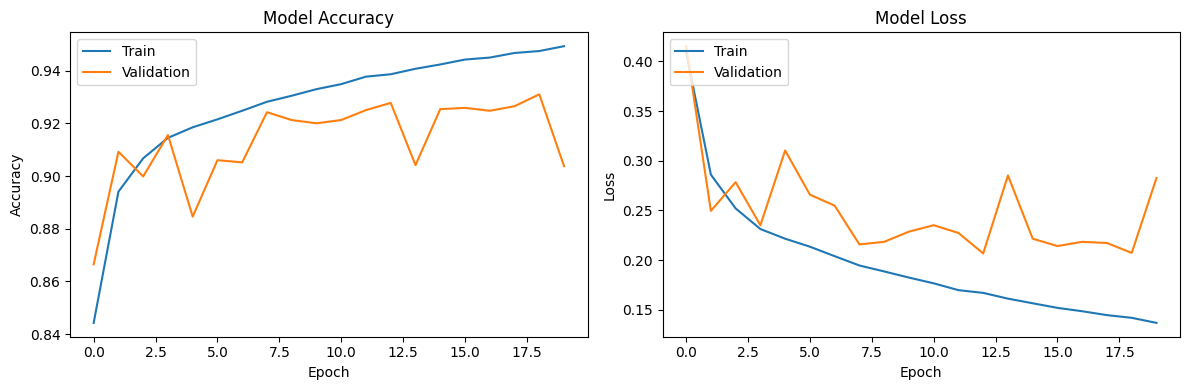

Found 125793 images belonging to 4 classes.
3932/3932 [==============================] - 57s 14ms/step
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     33872
           1       0.93      0.98      0.96     29516
           2       0.85      0.92      0.88     32527
           3       0.93      0.86      0.89     29878

    accuracy                           0.90    125793
   macro avg       0.91      0.91      0.91    125793
weighted avg       0.91      0.90      0.90    125793

[[29196   211  3630   835]
 [   18 28994    46   458]
 [ 1872   154 29984   517]
 [  947  1691  1590 25650]]


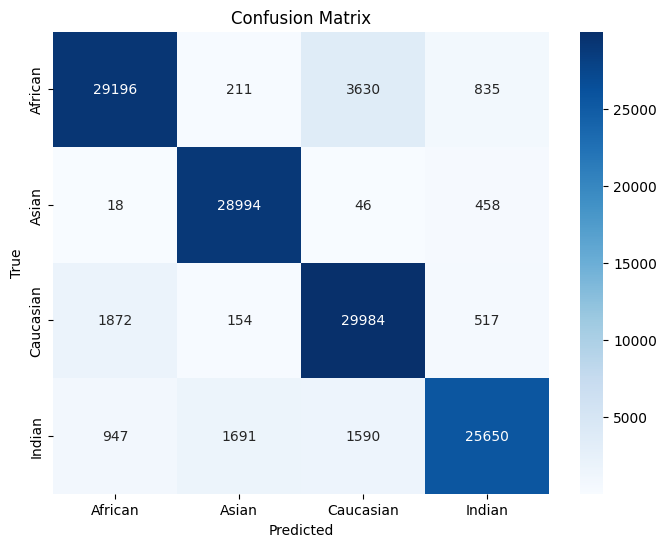

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define the number of classes and input shape
num_classes = 4  # 4 classes: African, Asian, Caucasian, Indian
input_shape = (146, 86, 1)  # Grayscale image dimensions

# Define the CNN model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/Output/train',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Data augmentation and preprocessing for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Output/validate',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Train the model with increased epochs
epochs = 20  # Adjust the number of epochs as needed

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=epochs)

# Save the model
model.save('/content/drive/MyDrive/race1_prediction_model_complex.h5')

# Plot training and validation curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/race1_prediction_model_complex.h5')

# Data preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Output/test',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical',
    shuffle=False)

# Generate predictions
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = [int(tf.argmax(prediction).numpy()) for prediction in predictions]

# Get the true labels
true_labels = test_generator.classes

# Calculate and print classification metrics
print(classification_report(true_labels, predicted_labels))

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

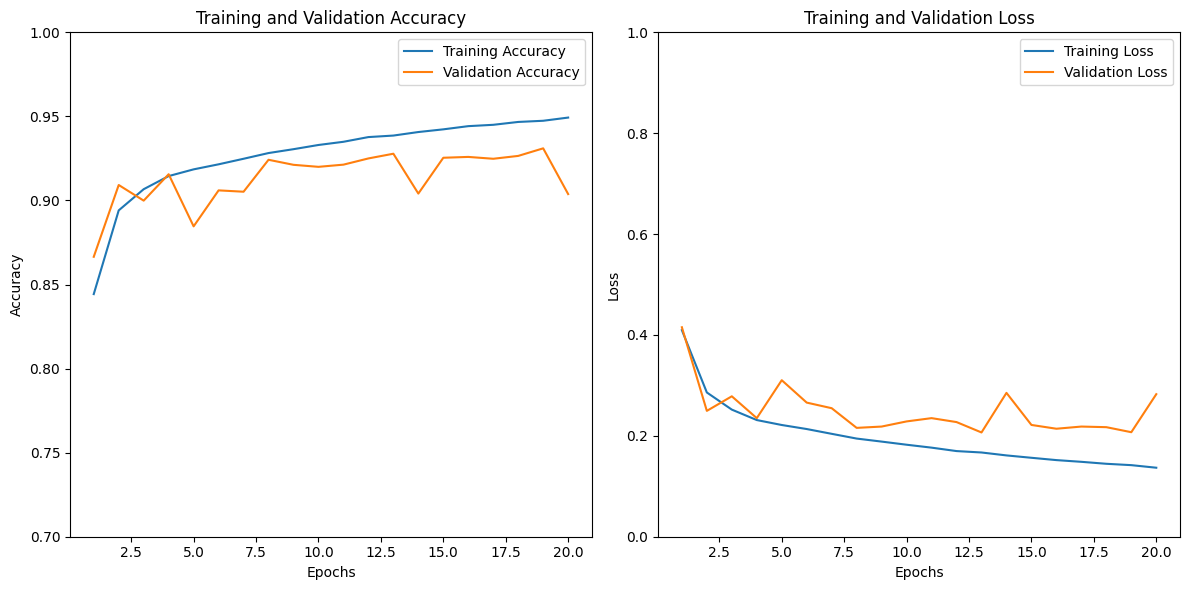

In [ ]:
import matplotlib.pyplot as plt

# Replace these lists with your actual training history
epochs = range(1, 21)  # Assuming you have trained for 20 epochs
training_accuracy = [0.8443, 0.8941, 0.9067, 0.9145, 0.9185, 0.9215, 0.9248, 0.9282, 0.9305, 0.9330, 0.9349, 0.9377, 0.9386, 0.9407, 0.9423, 0.9442, 0.9450, 0.9467, 0.9474, 0.9493]
validation_accuracy = [0.8665, 0.9092, 0.8999, 0.9156, 0.8846, 0.9060, 0.9052, 0.9242, 0.9212, 0.9200, 0.9213, 0.9250, 0.9278, 0.9041, 0.9254, 0.9259, 0.9248, 0.9265, 0.9310, 0.9038]

training_loss = [0.4096, 0.2860, 0.2520, 0.2313, 0.2215, 0.2135, 0.2040, 0.1946, 0.1886, 0.1824, 0.1766, 0.1698, 0.1670, 0.1612, 0.1565, 0.1519, 0.1485, 0.1446, 0.1419, 0.1368]
validation_loss = [0.4153, 0.2495, 0.2784, 0.2351, 0.3103, 0.2659, 0.2548, 0.2158, 0.2184, 0.2286, 0.2351, 0.2273, 0.2067, 0.2852, 0.2216, 0.2141, 0.2184, 0.2172, 0.2072, 0.2826]

# Plotting accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.7, 1)  # Set y-axis limits


# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits



plt.tight_layout()
plt.show()


Epoch 17

Found 575137 images belonging to 4 classes.
Found 125284 images belonging to 4 classes.
Epoch 1/17
17973/17973 [==============================] - 1038s 57ms/step - loss: 0.4060 - accuracy: 0.8457 - val_loss: 0.3636 - val_accuracy: 0.8663
Epoch 2/17
17973/17973 [==============================] - 989s 55ms/step - loss: 0.2785 - accuracy: 0.8971 - val_loss: 0.2639 - val_accuracy: 0.9051
Epoch 3/17
17973/17973 [==============================] - 1001s 56ms/step - loss: 0.2453 - accuracy: 0.9096 - val_loss: 0.2960 - val_accuracy: 0.8988
Epoch 4/17
17973/17973 [==============================] - 996s 55ms/step - loss: 0.2266 - accuracy: 0.9168 - val_loss: 0.3291 - val_accuracy: 0.8768
Epoch 5/17
17973/17973 [==============================] - 994s 55ms/step - loss: 0.2128 - accuracy: 0.9221 - val_loss: 0.4596 - val_accuracy: 0.8442
Epoch 6/17
17973/17973 [==============================] - 1000s 56ms/step - loss: 0.2033 - accuracy: 0.9256 - val_loss: 0.8494 - val_accuracy: 0.9171
Epoch 7/17
1797

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


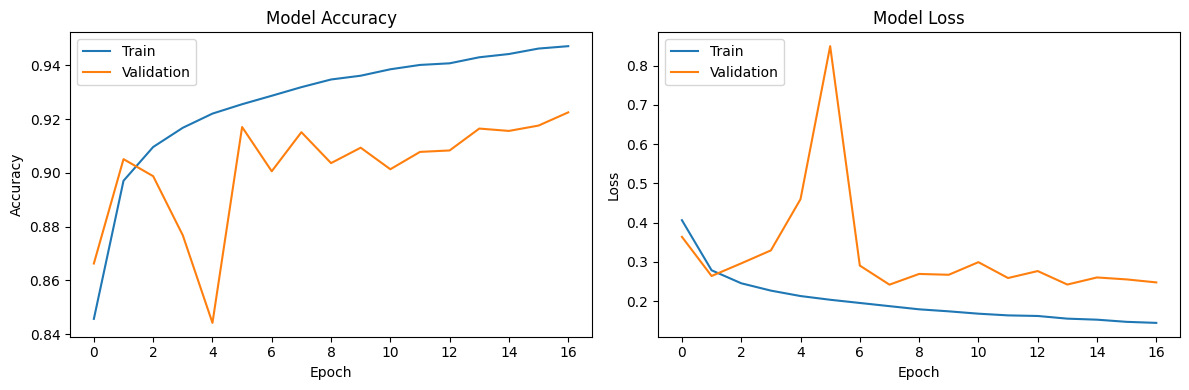

Found 124062 images belonging to 4 classes.
3877/3877 [==============================] - 67s 17ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     33095
           1       0.96      0.98      0.97     28613
           2       0.89      0.93      0.91     31115
           3       0.95      0.91      0.93     31239

    accuracy                           0.93    124062
   macro avg       0.93      0.93      0.93    124062
weighted avg       0.93      0.93      0.93    124062

[[29955   105  2458   577]
 [   21 28003    19   570]
 [ 1887    74 28783   371]
 [  829   973  1048 28389]]


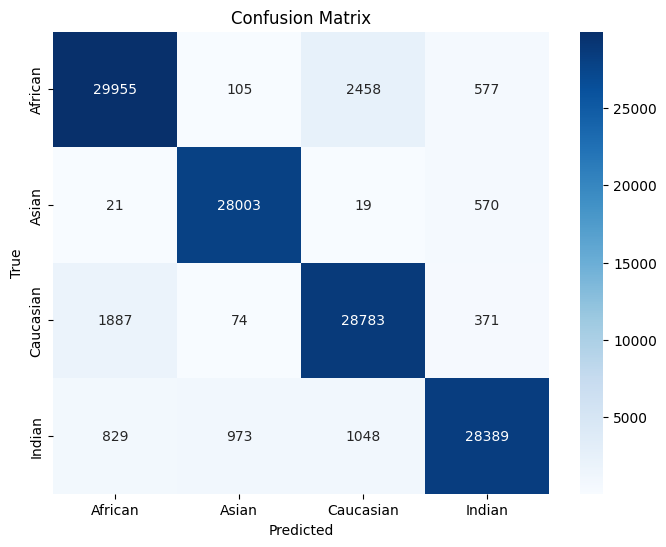

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define the number of classes and input shape
num_classes = 4  # 4 classes: African, Asian, Caucasian, Indian
input_shape = (146, 86, 1)  # Grayscale image dimensions

# Define the CNN model
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/Output/train',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Data augmentation and preprocessing for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Output/validate',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Train the model with increased epochs
epochs = 17  # Adjust the number of epochs as needed

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=epochs)

# Save the model
model.save('/content/drive/MyDrive/race2_prediction_model_complex.h5')

# Plot training and validation curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/race2_prediction_model_complex.h5')

# Data preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Output/test',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical',
    shuffle=False)

# Generate predictions
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = [int(tf.argmax(prediction).numpy()) for prediction in predictions]

# Get the true labels
true_labels = test_generator.classes

# Calculate and print classification metrics
print(classification_report(true_labels, predicted_labels))

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

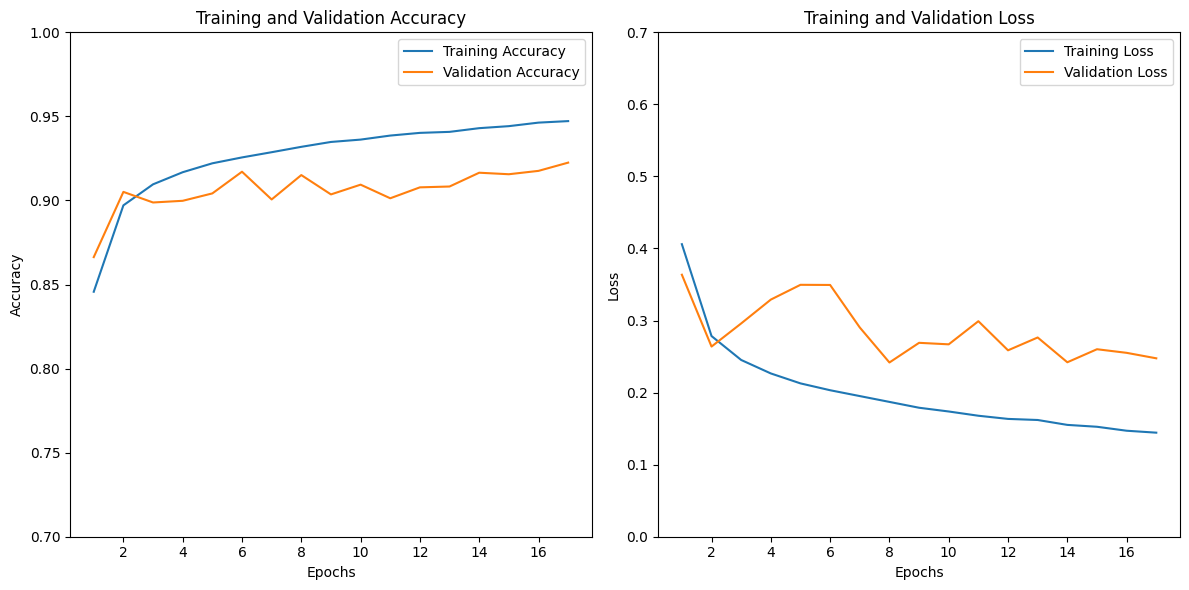

In [ ]:
import matplotlib.pyplot as plt

# Replace these lists with your actual training history
epochs = range(1, 18)  # Assuming you have trained for 17 epochs
training_accuracy = [0.8457, 0.8971, 0.9096, 0.9168, 0.9221, 0.9256, 0.9287, 0.9319, 0.9348, 0.9362, 0.9386, 0.9402, 0.9408, 0.9430, 0.9442, 0.9463, 0.9472]
validation_accuracy = [0.8663, 0.9051, 0.8988, 0.8998, 0.9042, 0.9171, 0.9006, 0.9151, 0.9036, 0.9094, 0.9013, 0.9078, 0.9083, 0.9165, 0.9156, 0.9176, 0.9225]

training_loss = [0.4060, 0.2785, 0.2453, 0.2266, 0.2128, 0.2033, 0.1952, 0.1871, 0.1790, 0.1738, 0.1679, 0.1635, 0.1620, 0.1552, 0.1526, 0.1471, 0.1444]
validation_loss = [0.3636, 0.2639, 0.2960, 0.3291, 0.3496, 0.3494, 0.2904, 0.2418, 0.2691, 0.2670, 0.2991, 0.2587, 0.2765, 0.2421, 0.2602, 0.2552, 0.2476]

# Plotting accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.7, 1)  # Set y-axis limits


# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.7)  # Set y-axis limits



plt.tight_layout()
plt.show()



Epock 17 and filter size (5X5)

Found 576240 images belonging to 4 classes.
Found 123646 images belonging to 4 classes.
Epoch 1/17
18007/18007 [==============================] - 1305s 72ms/step - loss: 0.4242 - accuracy: 0.8380 - val_loss: 0.2813 - val_accuracy: 0.8965
Epoch 2/17
18007/18007 [==============================] - 1286s 71ms/step - loss: 0.2710 - accuracy: 0.8997 - val_loss: 0.2743 - val_accuracy: 0.9004
Epoch 3/17
18007/18007 [==============================] - 1283s 71ms/step - loss: 0.2343 - accuracy: 0.9141 - val_loss: 0.2526 - val_accuracy: 0.9081
Epoch 4/17
18007/18007 [==============================] - 1289s 72ms/step - loss: 0.2134 - accuracy: 0.9217 - val_loss: 0.2209 - val_accuracy: 0.9216
Epoch 5/17
18007/18007 [==============================] - 1277s 71ms/step - loss: 0.1989 - accuracy: 0.9271 - val_loss: 0.2311 - val_accuracy: 0.9177
Epoch 6/17
18007/18007 [==============================] - 1281s 71ms/step - loss: 0.1864 - accuracy: 0.9315 - val_loss: 0.2283 - val_accuracy: 0.9218
Epoch 7/17
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


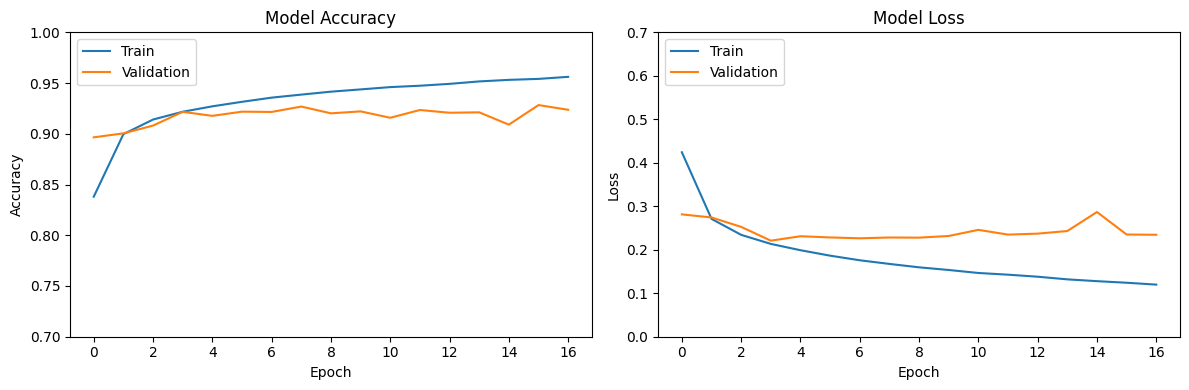

Found 124597 images belonging to 4 classes.
3894/3894 [==============================] - 67s 17ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     33519
           1       0.97      0.96      0.97     29480
           2       0.90      0.91      0.90     31236
           3       0.91      0.94      0.93     30362

    accuracy                           0.92    124597
   macro avg       0.93      0.93      0.93    124597
weighted avg       0.92      0.92      0.92    124597

[[29818    62  2680   959]
 [   34 28319    60  1067]
 [ 1947    38 28515   736]
 [  611   630   602 28519]]


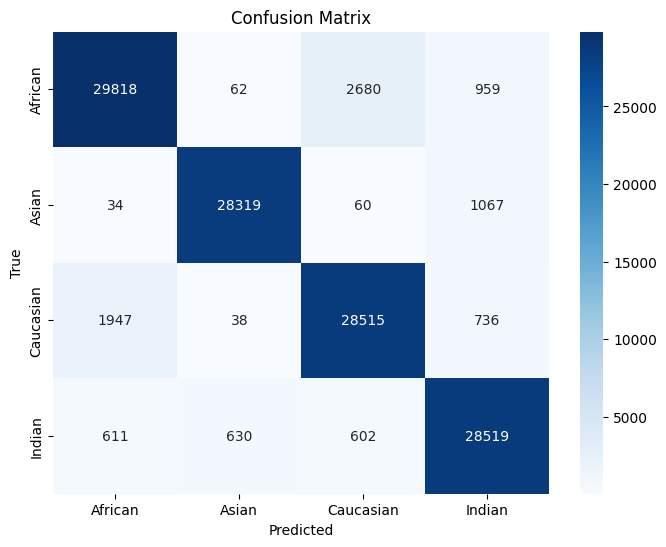

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define the number of classes and input shape
num_classes = 4  # 4 classes: African, Asian, Caucasian, Indian
input_shape = (146, 86, 1)  # Grayscale image dimensions

# Define the CNN model
model = Sequential()

# Block 1
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/Output/train',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Data augmentation and preprocessing for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Output/validate',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Train the model with increased epochs
epochs = 17  # Adjust the number of epochs as needed

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=epochs)

# Save the model
model.save('/content/drive/MyDrive/race3_prediction_model_complex.h5')

# Plot training and validation curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0.7, 1)  # Set y-axis limits


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0, 0.7)  # Set y-axis limits


plt.tight_layout()
plt.show()

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/race3_prediction_model_complex.h5')

# Data preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Output/test',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical',
    shuffle=False)

# Generate predictions
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = [int(tf.argmax(prediction).numpy()) for prediction in predictions]

# Get the true labels
true_labels = test_generator.classes

# Calculate and print classification metrics
print(classification_report(true_labels, predicted_labels))

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Other

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes and input shape
num_classes = 4  # 4 classes: African, Asian, Caucasian, Indian
input_shape = (146, 86, 1)  # Grayscale image dimensions

# Define the CNN model
model = Sequential()

# Block 1
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with SGD optimizer and adjusted learning rate
model.compile(optimizer=SGD(learning_rate=0.01),  # Adjust the learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/Output/train',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Data augmentation and preprocessing for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Output/validate',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical')

# Train the model with increased epochs
epochs = 15  # Adjust the number of epochs as needed

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=epochs)

# Save the model
model.save('/content/drive/MyDrive/race3_prediction_model_complex.h5')

# Plot training and validation curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/race3_prediction_model_complex.h5')

# Data preprocessing for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/Output/test',
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    color_mode='grayscale',  # Specify grayscale
    class_mode='categorical',
    shuffle=False)

# Generate predictions
predictions = model.predict(test_generator)

# Convert the predicted probabilities to class labels
predicted_labels = [int(tf.argmax(prediction).numpy()) for prediction in predictions]

# Get the true labels
true_labels = test_generator.classes

# Calculate and print classification metrics
print(classification_report(true_labels, predicted_labels))

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()